<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h1>K-Means</h1>
    <h2><a href = 'https://www.linkedin.com/in/ahmedsharaf9/' style = "text-decoration: none; color: #F5EDED">Ahmed Sharaf</a></h2>
</div>   </ul>
</div>

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Import Libraries</h2>
</div>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Import Data</h2>
</div>

In [11]:
X, y = make_blobs(n_samples=1000, centers = 3, n_features = 2)

In [12]:
X

array([[-7.79577546,  6.76980915],
       [-5.87583618,  6.18570432],
       [ 6.19620398, -7.26085317],
       ...,
       [-7.04548505,  7.39567866],
       [-6.99389965, -8.2503795 ],
       [-8.52243491, -7.46322046]])

In [13]:
# y is acutal clusters for check only in real case y is not avaliable
y

array([2, 2, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 2, 1,
       2, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 2, 1,
       2, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 1, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0,
       0, 0, 1, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2,
       1, 1, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 1, 0, 2, 1,
       2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2, 2, 2, 0, 1,
       0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1,
       2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 1, 1,

<div style = 'background-color: #6482AD; text-align:center; padding: 10px; color:#F5EDED'>
    <h2>Build K-Means Model</h2>
</div>

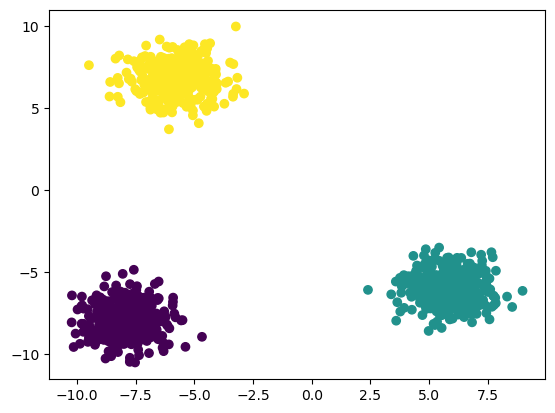

In [14]:
plt.scatter(X[:, 0], X[:, 1], c = y)

In [15]:
# train - Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.cluster import KMeans
# Elbow Method To Select K Value
wcss = []
for k in range(1, 11):
    kmeans= KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
    

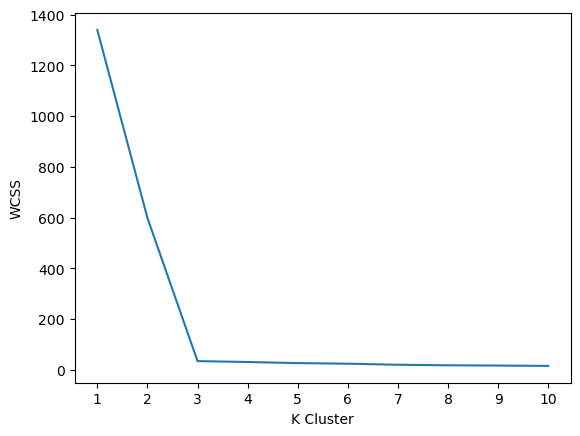

In [21]:
# drae elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel('K Cluster')
plt.ylabel('WCSS')
plt.show()

In [22]:
# From Above Curve We Select K = 3 at Elbow 
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit_predict(X_train)

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 2, 2, 2,
       1, 0, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 2, 0, 2, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 1, 0,
       2, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 2, 2, 1,
       0, 2, 2, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 0, 2, 1, 1,
       1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 0,
       2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0,
       2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 2,
       1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2,
       1, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1,
       2, 2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 2,

In [23]:
y_pred = kmeans.predict(X_test)

In [24]:
y_pred

array([2, 0, 1, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       2, 0, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0,
       1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 2, 0, 2, 1, 2, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 1, 1, 0,
       1, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 2, 2,
       2, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2,
       0, 1, 2, 0, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2,

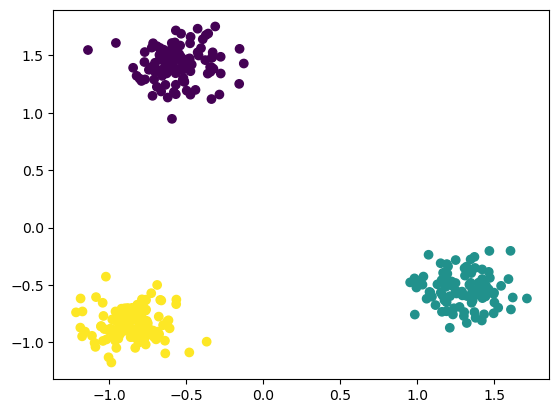

In [25]:
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_pred)

In [26]:
## Select Best K Used Another Elbow Method
# 1 - knee locater
# 2 - silhouette scoring

In [27]:
# knee locater
!pip install kneed

Defaulting to user installation because normal site-packages is not writeable


In [28]:
from kneed import KneeLocator
k1 = KneeLocator(range(1, 11), wcss, curve = 'convex', direction='decreasing')

In [30]:
k1.elbow

3

In [31]:
# silhouette scoring
from sklearn.metrics import silhouette_score
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

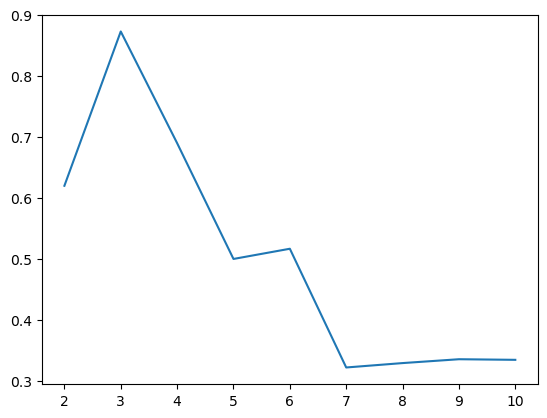

In [33]:
plt.plot(range(2, 11), silhouette_coefficients)

In [34]:
# best k is 3 that higest silhouette score